# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [4]:
#Cargamos dataset a utilizar
CensusIncome = pd.read_csv('adult.data',sep=',')

## Exploración de datos

In [5]:
#Visualizacion del dataframe
CensusIncome

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
#Renombramos las columnas
CensusIncome.columns = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [10]:
#Verificacion de datos
CensusIncome.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
23358,24,Private,424494,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,<=50K
23913,73,Private,220019,9th,5,Widowed,Other-service,Unmarried,White,Female,0,0,9,United-States,<=50K
22102,52,Self-emp-not-inc,199265,HS-grad,9,Divorced,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,<=50K
4299,21,Private,434710,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0,0,15,United-States,<=50K
21973,30,Private,111567,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,48,United-States,<=50K
21332,29,Private,85572,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,42,United-States,>50K
21964,21,Private,136873,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,10,United-States,<=50K
12528,65,Private,172510,Some-college,10,Widowed,Prof-specialty,Not-in-family,White,Female,1848,0,20,Hungary,<=50K
7522,29,Private,109621,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21207,21,Private,285127,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Black,Female,0,0,40,United-States,<=50K


En este conjunto de datos hay 15 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

-Nombre de la variable	Role	Tipo

-edad	Característica	Entero

-clase de trabajo	Característica	Categórico

-fnlwgt	Característica	Entero

-educación	Característica	Categórico

-número-educación	Característica	Entero

-Estado civil	Característica	Categórico

-ocupación	Característica	Categórico

-relación	Característica	Categórico

-carrera	Característica	Categórico

-sexo	Característica	Binario

-ganancia capital	Característica	Entero

-perdida de capital	Característica	Entero

-horas por semana	Característica	Entero

-patria	Característica	Categórico

-ingreso	Objetivo	Binario

In [11]:
#Analizamos el shape del objeto
CensusIncome.shape

(32560, 15)

In [12]:
#Visualizamos los tipos de datos
CensusIncome.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [13]:
CensusIncome.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Entrenamiento de random forest con scikit-learn

In [14]:
#Separamos en X e y
X = CensusIncome.drop('income',axis=1)
y = CensusIncome['income']

In [18]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=00000)

In [19]:
CensusIncome.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [20]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce #pip install category-encoders

encoder = ce.OrdinalEncoder(cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                    'marital-status', 'occupation', 'relationship', 'race', 'sex',
                                    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
                                    ])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [21]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
# random_forest = RandomForestClassifier(n_estimators=10,random_state=00000)
random_forest = RandomForestClassifier(criterion= 'entropy', max_depth= 6, n_estimators= 22,random_state=00000)

In [22]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=22,
                       random_state=0)

In [23]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [24]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accurancy = accuracy_score(y_train,y_train_pred)

#Calculo el accuracy en Test
test_accurancy = accuracy_score(y_test,y_test_pred)

print('El Accuracy en train es:',train_accurancy)
print('El Accuracy en test es:',test_accurancy)

El Accuracy en train es: 0.8416988416988417
El Accuracy en test es: 0.8356879606879607


In [25]:
#Verificamos el feature importances
feature_impotances_df = pd.DataFrame(
    {'feature': list(X.columns), 'importance':random_forest.feature_importances_}).sort_values('importance',ascending=False)

# Mostrar
feature_impotances_df

,feature,importance
5,marital-status,0.356398
7,relationship,0.209020
10,capital-gain,0.127943
4,education-num,0.077297
3,education,0.067424
6,occupation,0.039665
11,capital-loss,0.036360
12,hours-per-week,0.023035
9,sex,0.022307
0,age,0.011881


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'marital-status'),
  Text(1, 0, 'relationship'),
  Text(2, 0, 'capital-gain'),
  Text(3, 0, 'education-num'),
  Text(4, 0, 'education'),
  Text(5, 0, 'occupation'),
  Text(6, 0, 'capital-loss'),
  Text(7, 0, 'hours-per-week'),
  Text(8, 0, 'sex'),
  Text(9, 0, 'age'),
  Text(10, 0, 'workclass'),
  Text(11, 0, 'native-country'),
  Text(12, 0, 'fnlwgt'),
  Text(13, 0, 'race')])

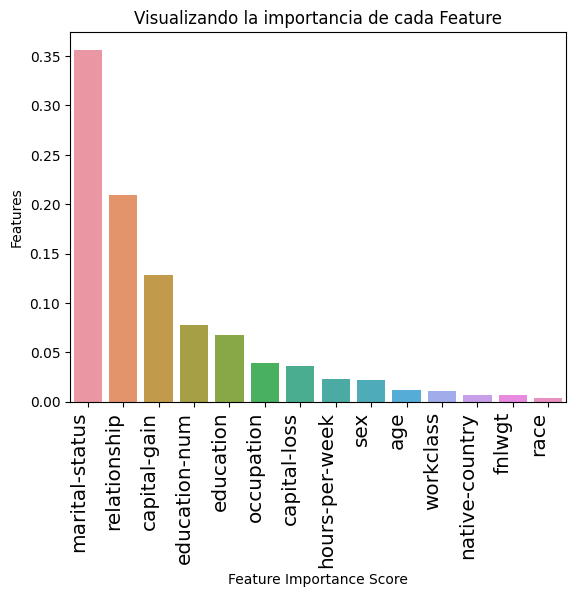

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_impotances_df.feature,y=feature_impotances_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=90,horizontalalignment='right',fontweight='light',size='x-large')

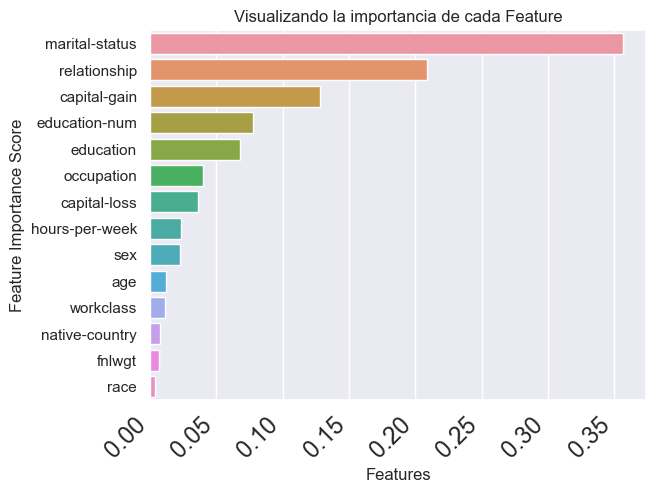

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame llamado feature_importances_df
sns.set_palette("bright")
sns.set_style("white")
sns.set(font_scale = 1)
sns.barplot(x=feature_impotances_df.importance, y=feature_impotances_df.feature)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', size='x-large')
plt.show()


C:\Users\silen\AppData\Local\Temp\ipykernel_27824\710142982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(CensusIncome.corr(), annot=True, cmap='coolwarm')


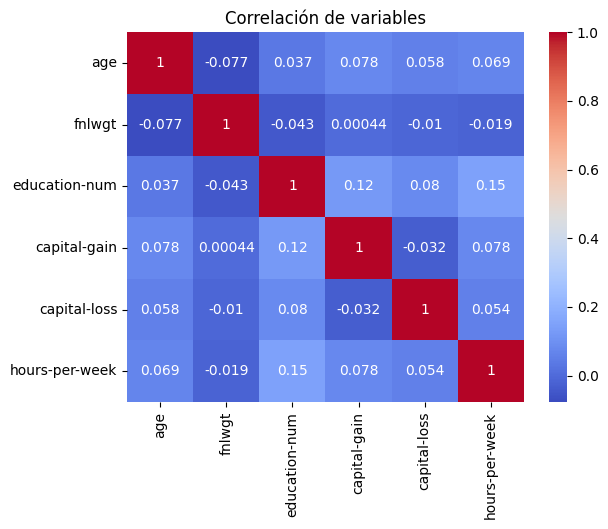

In [30]:
sns.heatmap(CensusIncome.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de variables')
plt.show()

In [31]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred)

print('Matriz de confucion\n\n',cm)

Matriz de confucion

 [[7029  425]
 [1180 1134]]


In [35]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      7454
        >50K       0.73      0.49      0.59      2314

    accuracy                           0.84      9768
   macro avg       0.79      0.72      0.74      9768
weighted avg       0.83      0.84      0.82      9768



In [36]:
# from sklearn.model_selection import GridSearchCV

# parametros = {
#     "n_estimators" : range(1,40),
#     "criterion": ["gini", "entropy", "log_loss"],
#     "max_depth": range(2,11)
# }

# rf_grid = GridSearchCV(
#     random_forest, 
#     parametros, 
#     cv=5, 
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=-1
# ).fit(X_train,y_train)

# # mejores parametros
# print(rf_grid.best_params_)

# # mejor score
# print(rf_grid.best_score_)